## Week 1, 2, 3 of Coding: Jan 17th-Feb 6th, 2023

Start with 4x4 box & get power spectrum code working (with the steps included)

np.ft() will compute the Fourier Transform for you

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stats

### **Step 1:** Create a 4x4 box

In [2]:
#creating 2D array with 4x4 dimensions

toy_box = np.random.normal(size = (4,4))

%precision 2
print(toy_box)

npix = toy_box.shape[0]

[[ 0.44  0.44  0.61 -0.03]
 [ 1.52 -0.4   0.04  0.99]
 [-1.19  1.42 -0.67 -1.42]
 [-0.13 -0.51  0.37 -0.44]]


### **Step 2:** Complete the Fourier Transform to get from r to k space

Units will be in $K*Mpc^3$

In [3]:
#using np.fft.fft() to compute the Fourier Transform
#radial values will now be in k space
#we need to use fft.fftshift because this function assumes we start at 0
    #rather, we want 0 to be in the middle of our function
    #this is the difference between astro and numpy units
    

#Make a function to shift, transform, and shift back
def cosmo_transform(input_box):
    #shifting the zero frequency component to the center
    shift_1 = np.fft.fftshift(input_box)
    
    #fourier transform after the shift
    #need to fourier transform here, shift does not transform alone
    transformed_box = np.fft.fftn(shift_1)
    
    #shifting the zero-frequency component back to its assumed numpy
    #original position
    shift_2 = np.fft.ifftshift(transformed_box)
    
    return shift_2

In [4]:
k_space_box = cosmo_transform(toy_box)
print(k_space_box)

[[-3.38+0.j    1.67-4.77j -1.85+0.j    1.67+4.77j]
 [-2.5 +0.22j  1.68-0.38j -3.31-2.86j -0.99+4.34j]
 [ 0.96+0.j   -0.29-1.84j  1.05+0.j   -0.29+1.84j]
 [-2.5 -0.22j -0.99-4.34j -3.31+2.86j  1.68+0.38j]]


### **Step 3:** Square this value to find the amplitude of this integral

Will get $(\lvert(T)\rvert)^2$ $(k^2 Mpc^6)$

In [5]:
amplitude = np.abs(k_space_box)**2
print(amplitude)

#testing if the values are correct
test = np.abs(k_space_box[0][0])**2
print(test)
    #[0][0] element does match up!

[[11.42 25.56  3.44 25.56]
 [ 6.27  2.96 19.17 19.86]
 [ 0.93  3.49  1.09  3.49]
 [ 6.27 19.86 19.17  2.96]]
11.415263634515021


### **Step 4:** Divide original Volume of Box

$P(k) = \frac{<(\lvert(T(k))\rvert)^2>}{V}$

Units are $k^2 Mpc^3$

In [6]:
#in this case it will be area, not volume
Area = 16 #since it is a 4x4 box

#getting the power spectra
    #we should be getting real values for our box computation
P_k = (amplitude/Area)

#proving that the 0. inputs are just infinitesimally small numbers
print("First Box Value::", P_k[0][0])
print("2D Array of P_k values:")
print(P_k)

First Box Value:: 0.7134539771571888
2D Array of P_k values:
[[0.71 1.6  0.21 1.6 ]
 [0.39 0.18 1.2  1.24]
 [0.06 0.22 0.07 0.22]
 [0.39 1.24 1.2  0.18]]


### **Step 5:** Attempting to Plot

Next, we need to convert to frequency space. The numpy convention for converting to frequency space is given by:

$f(\omega) = \int(dx*\exp(-i*2\pi*\omega*x)*f(x))$

The astro convention for converting to frequency space is given by

$f(k) = \int(dx*\exp(-ikx)*f(x))$

In [7]:
#creating a function to generate the k_x frequency array

def kx_frequency_array(one_D_array):
    #fourier transform to frequency space
    #need to fourier transform here, shift does not transform alone
    #1D array containing the wavevectors 
    #by multiplying by the total # of pixels, we convert them to pixel freq.
    kfreq = np.fft.fftfreq(one_D_array)*2*np.pi
    
    #shifting back to its assumed numpy position
    k_x = np.fft.fftshift(kfreq)
    
    return k_x

In [8]:
#THIS IS THE K_X ARRAY
k_x = kx_frequency_array(npix)

In [9]:
#creating a function to generate the k_y frequency array

def ky_frequency_array(one_D_array):
    #fourier transform to frequency space
    #need to fourier transform here, shift does not transform alone
    #1D array containing the wavevectors 
    #by multiplying by the total # of pixels, we convert them to pixel freq.
    kfreq = np.fft.fftfreq(one_D_array)*2*np.pi
    
    #shifting back to its assumed numpy position
    k_y = np.fft.fftshift(kfreq)
    
    return k_y

In [10]:
#THIS IS THE K_Y ARRAY
k_y = ky_frequency_array(npix)

In [11]:
#creating an array matching our toy_box array
kfreq2D = np.meshgrid(k_x, k_y)
print(kfreq2D)

[array([[-3.14, -1.57,  0.  ,  1.57],
       [-3.14, -1.57,  0.  ,  1.57],
       [-3.14, -1.57,  0.  ,  1.57],
       [-3.14, -1.57,  0.  ,  1.57]]), array([[-3.14, -3.14, -3.14, -3.14],
       [-1.57, -1.57, -1.57, -1.57],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.57,  1.57,  1.57,  1.57]])]


In [12]:
#normalisation factor
#finding distance between pixels
k_values = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
print(k_values)

[[4.44 3.51 3.14 3.51]
 [3.51 2.22 1.57 2.22]
 [3.14 1.57 0.   1.57]
 [3.51 2.22 1.57 2.22]]


$\textbf{Ring Model:}$ For a deisgnated value of k, we take all of the fourier transformed array values that fit within that one k value

In [13]:
#when you have K array and fourier transform array, implement the Ring Model

#for i, j in k_array, return position(s) of array in [i,j] when k = 1-2 (for example)
#need to bin data into rings so each of the fourier transform will eventually fall into 
    #one of these bins

def find_element_positions(input_k, start, end):
    positions = []
    #iterating through first dimension
    for i in range(len(input_k)):
        #iterating through second dimension
        for j in range(len(input_k[0])):
            #for elements within our inputted desired range
            if start <= input_k[i][j] <= end:
                positions.append((i, j))
    
    #will return tuples that given the locations of the elements in the given range
    return positions

In [14]:
ring_1 = find_element_positions(k_values, 0, 1)
print(ring_1)

ring_2 = find_element_positions(k_values, 1, 2)
print(ring_2)

ring_3 = find_element_positions(k_values, 2, 3)
print(ring_3)

ring_4 = find_element_positions(k_values, 3, 4)
print(ring_4)

ring_5 = find_element_positions(k_values, 4, 5)
print(ring_5)

[(2, 2)]
[(1, 2), (2, 1), (2, 3), (3, 2)]
[(1, 1), (1, 3), (3, 1), (3, 3)]
[(0, 1), (0, 2), (0, 3), (1, 0), (2, 0), (3, 0)]
[(0, 0)]


In [15]:
#find corresponding [i,j] positions in fourier transform array 
#should be same dimensions as k array
    
def get_corresponding_values(input_k, fourier_array, start, end):
    #calling the function that returns the position tuples
    positions = find_element_positions(input_k, start, end)
    
    #find the corresponding values in fourier array using the position tuples
    values = [fourier_array[i][j] for i, j in positions]
    
    return values

In [16]:
fourier_ring_1 = get_corresponding_values(k_values, P_k, 0, 1)
print(fourier_ring_1)

fourier_ring_2 = get_corresponding_values(k_values, P_k, 1, 2)
print(fourier_ring_2)

fourier_ring_3 = get_corresponding_values(k_values, P_k, 2, 3)
print(fourier_ring_3)

fourier_ring_4 = get_corresponding_values(k_values, P_k, 3, 4)
print(fourier_ring_4)

fourier_ring_5 = get_corresponding_values(k_values, P_k, 4, 5)
print(fourier_ring_5)

[0.06833350452843409]
[1.1983042419819572, 0.2180041250551365, 0.2180041250551365, 1.1983042419819572]
[0.18481640998210103, 1.2412614434398386, 1.2412614434398386, 0.18481640998210103]
[1.597225824384455, 0.21469774355756632, 1.597225824384455, 0.39201652019057803, 0.057927877583069026, 0.39201652019057803]
[0.7134539771571888]


In [17]:
#Then add all of these fourier transform array values together and average them
#this will be one point on your (P(k), k) plot

def avg_corresponding_values(input_k, fourier_array, start, end):
    #calling the corresponding values function to give values
    values = get_corresponding_values(input_k, fourier_array, start, end)
    
    #getting the average of these points
    avg = sum(values)/len(values)
    
    #returns average fourier values for corresponding k range
    return avg

In [18]:
point1 = avg_corresponding_values(k_values, P_k, 0, 1)
print(point1)

point2 = avg_corresponding_values(k_values, P_k, 1, 2)
print(point2)

point3 = avg_corresponding_values(k_values, P_k, 2, 3)
print(point3)

point4 = avg_corresponding_values(k_values, P_k, 3, 4)
print(point4)

point5 = avg_corresponding_values(k_values, P_k, 4, 5)
print(point5)

0.06833350452843409
0.7081541835185469
0.7130389267109698
0.7085183850484502
0.7134539771571888


In [19]:
#SHOULD EXPECT A FLAT LINE IN YOUR FINAL P(K) VS K PLOT
#maybe some noise due to the fact that it is such a small plot

def power_spectra_plot(input_k, fourier_array, start_values, end_values):
    
    #getting the average fourier value for the chosen k range
    avg_values = [avg_corresponding_values(input_k, fourier_array, start, end) for start, end in zip(start_values, end_values)]
    #list of integers from our chosen range values
    #will be the labels for the x-axis
    range_values = list(range(len(start_values)))
    
    plt.plot(range_values, avg_values)
    
    #plot specifications
    plt.xlabel("$k$", size = 12)
    plt.ylabel("$P(k)$", size = 12)
    plt.suptitle("Power Spectrum from a 2D Toy Box", size = 15)
    plt.tight_layout()
    

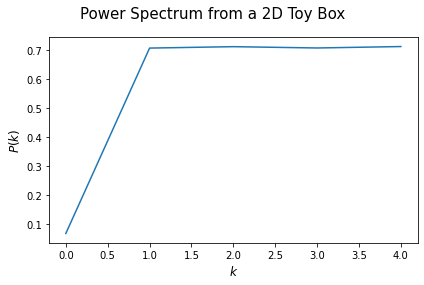

In [20]:
#The range of values that were previously decided on 
start_k = [0, 1, 2, 3, 4]
end_k = [1, 2, 3, 4, 5]

power_spectra_plot(k_values, P_k, start_k, end_k)